# Data Provisioning Phase(2)

## Data collection

In [11]:
#importing libreries we need 
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("max_colwidth", 200)
random_state = 42

I am importing two differents dataSet one with the True news, and another one with the fake news.

- The sources of the TRUE NEWS :Reuters, the New York Times, the Washington Post and more

- The sources of the FAKE NEWS:
 1) American right wing extremist websites (such as Redflag Newsdesk, Beitbart, Truth Broadcast Network)
 
 2) A previously made public dataset described in the following article:
    Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).
    
3) Disinformation and propaganda cases collected by the EUvsDisinfo project. A project started in 2015 that identifies and fact checks disinformation cases originating from pro-Kremlin media that are spread across the EU.

In [12]:
# importing dataset with True news
df_true = pd.read_csv('DataSet_Misinfo_TRUE.csv')


In [13]:
# importing dataset with Fake news
df_fake = pd.read_csv('DataSet_Misinfo_FAKE.csv')

## Data Preparation

Creating new column tha provide 1 = <b>TRUE</b> in order to prepare the data for the model and removing unnecessary column


In [14]:
df_true['label']=1
df_true=df_true.drop('Unnamed: 0',axis=1)
df_true.head()

,text,label
0,"The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Su...",1
1,"Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s ad...",1
2,"The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration al...",1
3,"Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported ...",1
4,"President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized i...",1


Creating new column tha provide 0 = <b>FALSE</b> in order to prepare the data for the model and removing unnecessary column

In [15]:
# same logic as above but this time 0 = fake 

df_fake['label']=0
df_fake=df_fake.drop('Unnamed: 0',axis=1)
df_fake.head()

,text,label
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former...",0
1,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia inve...",0
2,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In...",0
3,"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Bar...",0
4,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned T...,0


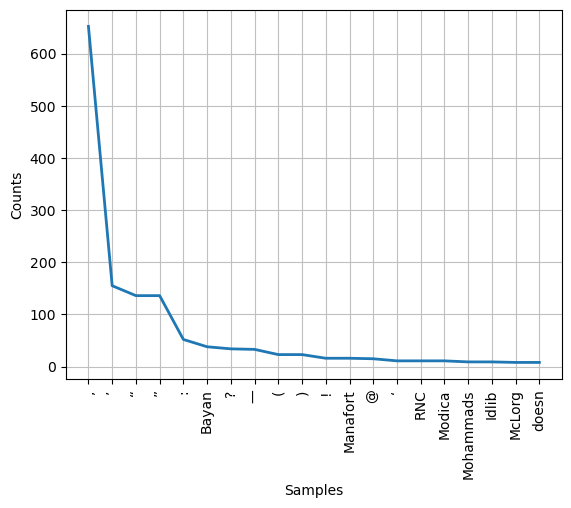

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
import enchant
import nltk
from nltk.tokenize import word_tokenize

# initialize the dictionary for spell checking
english_dict = enchant.Dict("en_US")

# take a random sample of 20 rows from dfFull
df_sample_prep = dfFull.sample(n=20, random_state=42)

# tokenize the text data
df_sample_prep['text_tokens'] = df_sample_prep['text'].apply(lambda x: word_tokenize(x))

# identify misspelled words
misspelled_words = []
for tokens in df_sample_prep['text_tokens']:
    for word in tokens:
        if not english_dict.check(word):
            misspelled_words.append(word)

# count the frequency of each misspelled word
freq_dist = nltk.FreqDist(misspelled_words)

# plot the most common misspelled words
freq_dist.plot(20, cumulative=False)


This code identify misspelled word in the "text" column, it use a library to check if each word in the text is present in the english dictionary, if it is not there is consider misspelled. It is important to spot mispelled words, because they can negatively impact the accuracy of the model. 

## Data understanding

After I have provide the label 1 0 to both dataSet I join them with the results of one single merged dataset. And then display information about the datSet. We can notice that true news has more observation (29), so first thing to do is checking for missing values, because maybe that 29 more observation are missing values.

In [22]:
dfFull = pd.concat([df_true,df_fake])
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78617 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78617 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


## Show rows with missing data

In [23]:
df_missing = dfFull[dfFull.isnull().any(axis=1)]

df_missing

,text,label
2922,NaN,1
3488,NaN,1
3782,NaN,1
4358,NaN,1
4465,NaN,1
5290,NaN,1
5588,NaN,1
5761,NaN,1
5784,NaN,1
6026,NaN,1


These are the only missing values present, the reasons can be many, the most plausible in my opinion is human error during the manipulation of the dataset for the TRUE news, evidently, somehow, the texts have been lost, Consequently, the best thing to do and simply remove all 29 rows, as compared to the total number of observations in the database it is a very small number

Spotting missing values in both dataSet in order to tackle them, and see if that 29 more rows are 29 missing values.

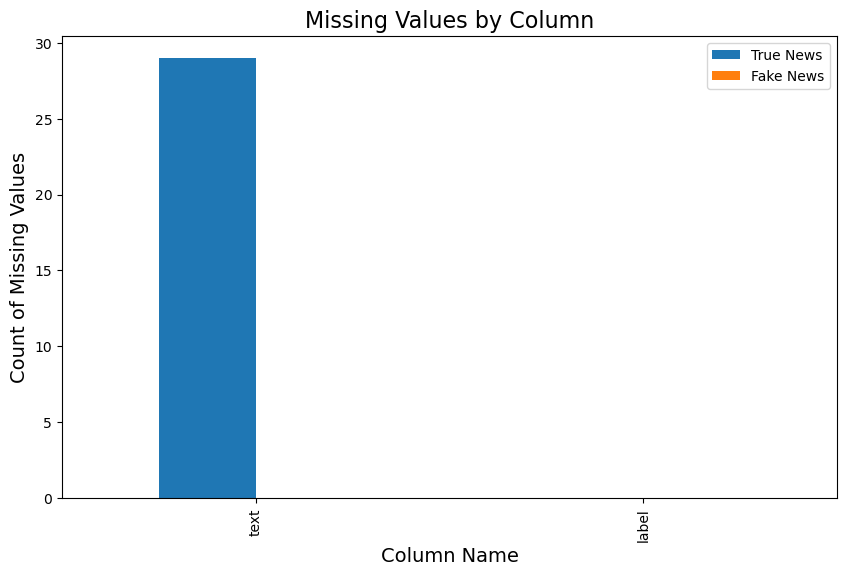

In [24]:
import matplotlib.pyplot as plt

# count missing values in df_true dataframe
true_missing_values = df_true.isnull().sum()

# count missing values in df_fake dataframe
fake_missing_values = df_fake.isnull().sum()

# combine the two counts into a single dataframe
missing_values_df = pd.concat([true_missing_values, fake_missing_values], axis=1, keys=['True News', 'Fake News'])

# plot the bar chart
missing_values_df.plot(kind='bar', figsize=(10, 6))

# add chart titles and labels
plt.title('Missing Values by Column', fontsize=16)
plt.xlabel('Column Name', fontsize=14)
plt.ylabel('Count of Missing Values', fontsize=14)

# show the chart
plt.show()



As we can see true news are 29 missing values, which corresponding to our guess, so the best thing to do is eliminating them, so we have same numbers of columns for both fake and true and we eliminate the null values that we do not need at all, is a small number compare of the total non-null values (way more less than 1%) that we have, so does not need to be tackled in differents way. Elimating the rows is the fastest and best thing to do.

<AxesSubplot:xlabel='label', ylabel='count'>

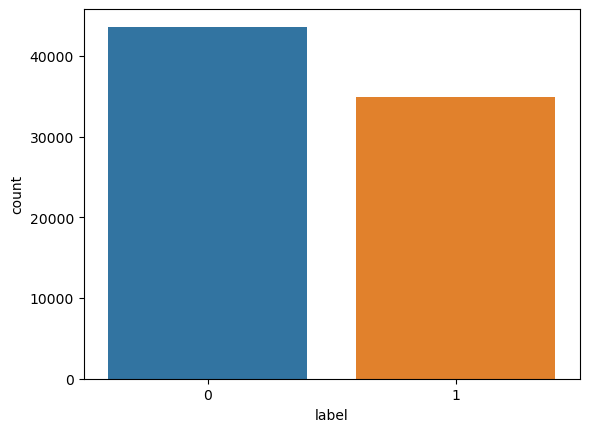

In [25]:
import seaborn as sns

# create a countplot of the target variable before dropping missing values
sns.countplot(x='label', data=dfFull)



<AxesSubplot:xlabel='label', ylabel='count'>

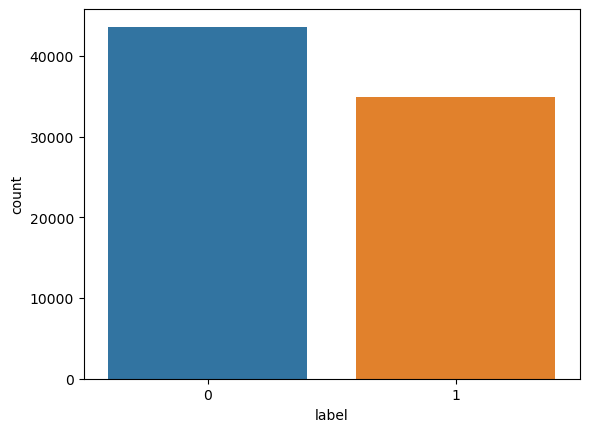

In [26]:
# drop rows with missing values
dfFull = dfFull.dropna(how='any')

# create a countplot of the target variable after dropping missing values
sns.countplot(x='label', data=dfFull)

The above bar graph shows that the missing values were just in the colum text. But the graph shows an interesting thing: the target variable has more values of False news, still this is not will cause bias in the model, because the differences is not that high. So the dataset is balance

In [27]:
dfFull.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78588 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78588 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


We sucessfully eliminating the null values and as is shown in the df.info(), we have the same numbers for both 0 and 1 (fake and true)

In [28]:
dfFull.sample(10)

,text,label
25513,"November 1, 2016 Half of Russians fear Syria could spark World War III \nNearly half of Russians fear that Moscow’s bombing campaign in Syria could spark World War III, a poll showed Monday. \nMos...",0
38428,Sodomy takes one Western country after another. West wants to bring sodomy to Belarus through Polish Catholic priests as local priests do not want to promote alien interests. Polish Catholic pries...,0
25926,"BUSTED: Clinton Foundation Directly Tied To Plot To Steal Election Posted on October 27, 2016 by Prissy Holly in Politics Share This \nEver since early voting began, numerous reports are claiming ...",0
27120,LONDON — A Romanian architect who plunged into the River Thames when a terrorist plowed a vehicle into pedestrians in London became the fifth victim to die as a result of the attack last mo...,1
6569,Top Montana Democratic and Republican lawmakers on Tuesday warned neo-Nazis they would find “no safe haven” for a rally that could include guns planned for next month in a mountain town where whit...,1
37785,"In addition to the 4 oligarchs in Ukraine, there is also a fifth - US Special Representative Kurt Volker, who does what he wants, and who actually rules the country.",0
26474,"Treasury, Bank of England and IMF Brexit forecasts proved wrong Published: October 29, 2016 Source: Express UK \nTHE Treasury, Bank of England and International Monetary Fund (IMF) are among the s...",0
2199,"With U.S. Congress members focused during their August recess on finding ways to lower the corporate tax rate, industry groups and other sectors of society are gearing up to fight proposed changes...",1
839,"North Korea called on Friday for a halt to what it called “brutal sanctions”, saying the measures",1
38657,Ukraine adopted a new law that will allow it to detain all Russian vessels in the Black Sea and to shoot on sight.,0


text     object
label     int64
dtype: object


<AxesSubplot:ylabel='count'>

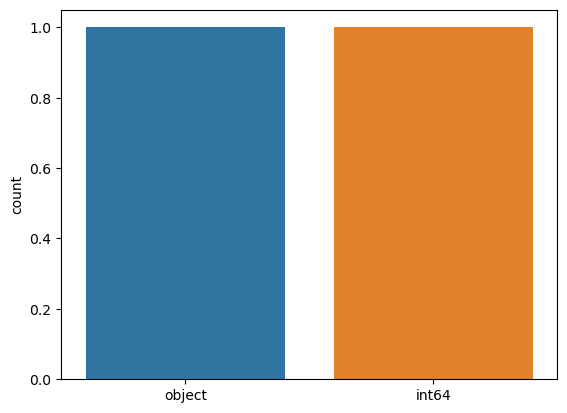

In [29]:

# check the data type of each column
print(dfFull.dtypes)

# visualize the data types using a countplot
sns.countplot(x=dfFull.dtypes)

Here we are counting each dataType how many times appear. Clearly the datatype int64 will appear twice as much compare to object because we have the label column and the text_length (which count the length of the text). In general we can infer that we have a balance between the datatypes. If we remove the length of the text, we will have 1 for object and 1 for int64, which will make sense because for each text we have the relative label 

We show a sample of the final dataframe before proceding with further steps

Dataset size:
Number of rows: 78588
Number of columns: 2

Distribution of labels:
Fake news count: 43642
Non-fake news count: 34946


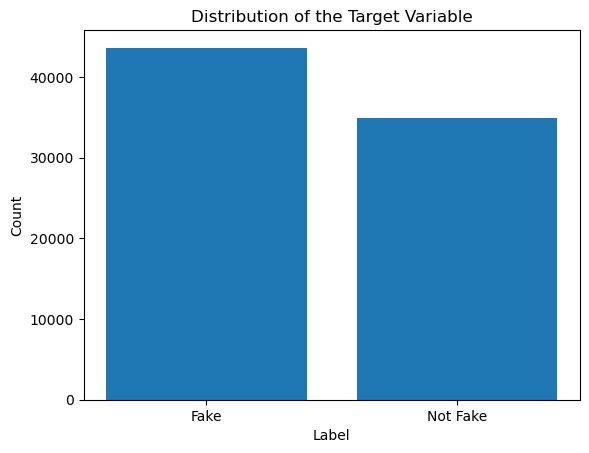

In [30]:
# Examine the size of the dataset
print("Dataset size:")
print("Number of rows:", dfFull.shape[0])
print("Number of columns:", dfFull.shape[1])


# Examine the distribution of fake news and non-fake news articles
fake_news_count = (dfFull['label'] == 0).sum()
non_fake_news_count = (dfFull['label'] == 1).sum()

print("\nDistribution of labels:")
print("Fake news count:", fake_news_count)
print("Non-fake news count:", non_fake_news_count)

# Plot the distribution of labels
labels = ['Fake', 'Not Fake']
counts = [fake_news_count, non_fake_news_count]

plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable')
plt.show()


The bar graph shows how the target variable is distributed and counts how many fake news and non-fake news are present in the article. As the bar graph shows, we have more fake news in the dataset, and again (we alread stated it above) will not be an issue, and we can still consider the dataset balance

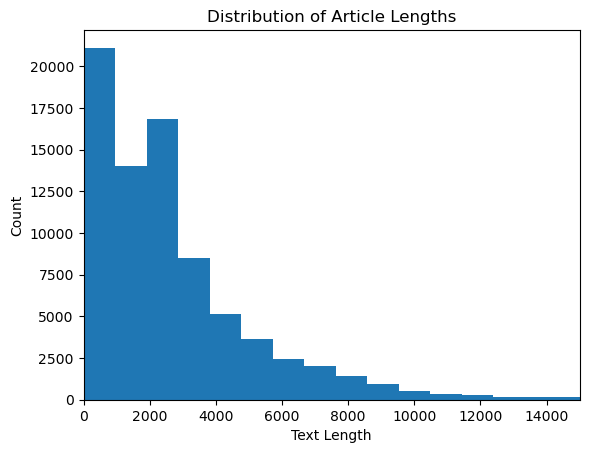

In [31]:
# Histogram of article lengths
dfFull['text_length'] = dfFull['text'].apply(len)
plt.hist(dfFull['text_length'], bins=150)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Article Lengths')

# Change the x-axis limits
plt.xlim(0, 15000)  # Set the lower and upper limits of the x-axis

plt.show()

This bar graph shows the length of the articles within the dataset. Most articles have a maximum length of around 3,000 words

<AxesSubplot:>

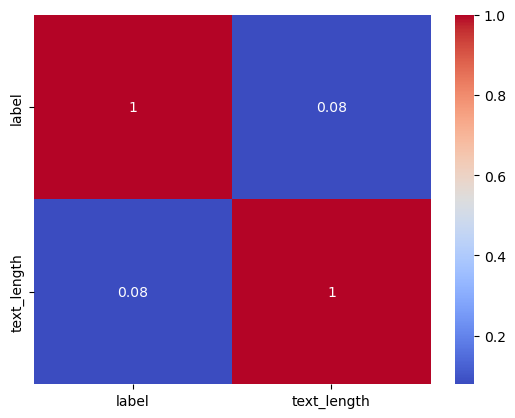

In [32]:
import seaborn as sns

corr_matrix = dfFull.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The heatmap shows the correlation between the features. (ask info to teacher). It shows that there is no correletion between the lenght of the news, and if the news is either true or false.

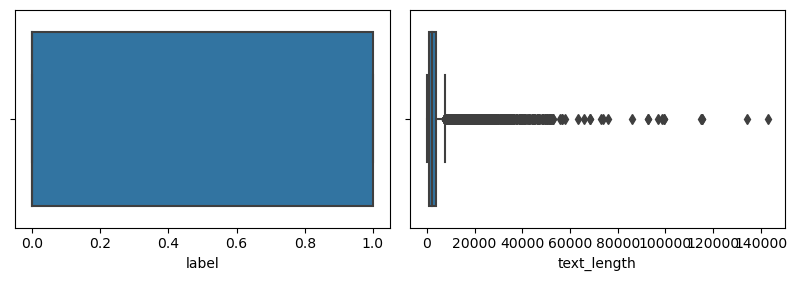

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only the numerical columns in the DataFrame
numerical_cols = dfFull.select_dtypes(include='number').columns.tolist()

# create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=dfFull[col])
    plt.tight_layout()


For checking for outliers, we count and show the distribution of the two numerical variables we have (label) and text_lenght. As we can see most of the text has a length of 0 to 2000, still we do not need to manipulate the outliers, because they do not have any effects on the model.

# Predictions Phase (3)

#### Check proper values for MIN DIF  and MAX WORDS

C:\Users\Roberto Conti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


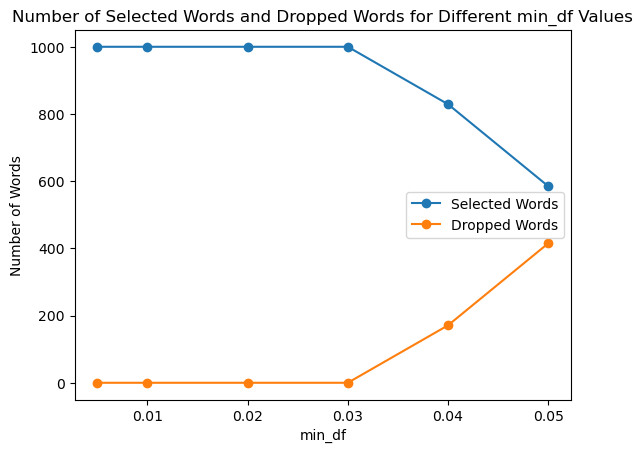

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

sample_size = 5000
max_words = 1000
min_dfs = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05] 


df = dfFull.sample(sample_size, random_state=random_state)

num_selected_words = []
num_dropped_words = []

for min_df in min_dfs:
    vectorizer = TfidfVectorizer(max_features=max_words, min_df=min_df, stop_words="english")
    X_vectorized = vectorizer.fit_transform(df["text"]).toarray()
    selected_words = vectorizer.get_feature_names()

    num_selected_words.append(len(selected_words))
    num_dropped_words.append(max_words - len(selected_words))

# Plot the number of selected words and dropped words for each min_df value
plt.plot(min_dfs, num_selected_words, marker='o', label='Selected Words')
plt.plot(min_dfs, num_dropped_words, marker='o', label='Dropped Words')
plt.xlabel('min_df')
plt.ylabel('Number of Words')
plt.title('Number of Selected Words and Dropped Words for Different min_df Values')
plt.legend()
plt.show()


It is important to define the minimum document frequency, as it decides when a word will or will not be kept in the vocabulary based on its frequency. Deciding the min_df influences factors such as:

Coverage,
Relevance,
Overfitting

In fact, having a low min_df allows us to have a greater <b>coverage</b> of words where more unique terms are included in the vocabulary. , while the <b>relevance</b> tells us precisely the relevance of a word, If the number of selected words is significantly higher than the dropped words, it may include many noise or irrelevant terms that could negatively impact the model's performance. Concerning <b>overfitting</b> a lower number of selected words and a higher number of dropped words can help prevent overfitting, where the model becomes too specific to the training data and performs poorly on new, unseen data.

By seeing the graph I will use min_df = 0.04 because it is the best trade-off between selected and dropped words, and giving the right balance between Coverage, Relevance and Overfitting.

the above vectorizer removed the original text from the observation, it is added again for semplicty of readability for humans 

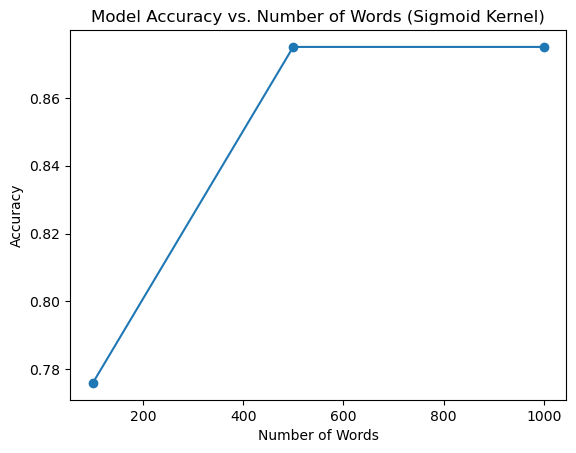

In [36]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Sample the dataset
df_sampled = df.sample(sample_size, random_state=random_state)

# Define the different numbers of words to evaluate
word_counts = [100, 500, 1000]

# Initialize an empty list to store accuracies
accuracies = []

# Iterate over the word counts
for word_count in word_counts:
    # Vectorize the text using the specified word count
    vectorizer = TfidfVectorizer(max_features=word_count, min_df=min_df, stop_words="english")
    X_vectorized = vectorizer.fit_transform(df_sampled["text"]).toarray()

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df_sampled["label"], test_size=0.2, random_state=random_state)

    # Train an SVM model with sigmoid kernel
    model = SVC(kernel='sigmoid')
    model.fit(X_train, y_train)

    # Evaluate the model on the test set and store the accuracy
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the accuracy vs. number of words
plt.plot(word_counts, accuracies, marker='o')
plt.xlabel('Number of Words')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Number of Words (Sigmoid Kernel)')
plt.show()


I tested different numbers of words to see if I could use more than 500; as the graph shows, when the number of words increases, the accuracy also increases, consequently the model will not be overfitted if I increase the number of words. If there had been a decrease in the graph, then this would have meant that as the number of words increased, overfitting would have occurred. In conclusion I can use 1000

# Predictions Phase (3)

# SVM CLASSIFIER (Sigmoid kernel)

Due to the fact that the solution I am trying to tackle, is a classification problem, I have decided to use a support vector Machine, which use hyperplanes to divide the two class. First thing I have done, is trying a linear kernel, which gave me an higher percentage of accuracy. This high accuracy was due to the fact that the model was overfitted, because I fitted a line on data points that weren't at all linearly separable, so basically with real world data, would just wrongly classify them. So then, after some research, feedbacks and logic, and graph my data I came to the conclusion that the data were not liner seperable, so the decision of using a <b>sigmoid Kernel</b>. So the input data are transformed into a higher dimensional space and in this way the classes are easy to be separate.
    The choose of sigmoid is because the data are not linear seperable, and so the SVM classifier work better by using this type of kernel

## Text pre-processing

I choose a sample size of 5000 to limit the amount of data being processed, in this way it more efficient and easier to work with. I have tried with bigger numbers but does not change the accuracy. I choose max words 1000, because it gave me a better accuracy than 100 max_words, but can cause overfitting, So then i Have decided for 500 that gives 87% of accuracy, which is pretty high. min_df define that a word should be appear at least more than 1% of the texts to be included in the vocabulary (max_words).

The vectorizer is then used to fit and reshape the text column of the df, and the outcome is then converted to a NumPy array. The collection that results is given to X_vectorized. By converting X_vectorized to a Pandas dataframe and adding a new column max_words to it, which contains the original text from the text column of df, we have the final dataframe

In [37]:
sample_size = 5000
max_words = 1000
min_df = .04

df = df.sample(sample_size, random_state=random_state)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=max_words, min_df=min_df, stop_words= "english")
X_vectorized = vectorizer.fit_transform(df["text"]).toarray()
X_vectorized.shape

(5000, 829)

the above vectorizer removed the original text from the observation, it is added again for semplicty of readability for humans 

In [38]:
X = pd.DataFrame(X_vectorized)
X[max_words] = df["text"].values
y = df["label"]
X

,0,1,2,3,4,5,6,7,8,9,...,820,821,822,823,824,825,826,827,828,1000
0,0.047025,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.066685,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,"Here Are The Presstitutes Who Control American's Minds . \nI just heard an NPR presstitute declare that Texas, a traditional sure thing for Republicans was up for grabs in the presidential electio..."
1,0.000000,0.051527,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.069849,0.0,0.0,0.037099,0.038709,0.0,0.000000,0.060611,"Well, this is embarrassing! The NFL commissioner was getting help from a helicopter wife who set up a fake twitter account to counter any negative press on her husband. It s pretty shocking becaus..."
2,0.000000,0.000000,0.0,0.155053,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.049397,0.000000,0.0,0.000000,0.000000,Florida s Republican governor Rick Scott is not allowing the impending pressure of Hurricane Matthew to interrupt his partisan push on behalf of Donald Trump in his state. The storm is expected to...
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.348709,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Everyone s been asking where the Hillary van is So Hillary pulls up in a gas guzzling van with tinted windows-I thought she wanted to mingle with the regular folk? This monster gets 16-18 miles pe...
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Podcast: Play in new window | Download | Embed \nYou’ll no doubt remember the quotes from that 1998 60 Minutes piece on Soros from Episode 113 of The Corbett Report podcast. Well guess what? That ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Republican U.S. Senator Ted Cruz on Tuesday accused the Obama administration of under-emphasizing the “threat of radical Islam” as he presided over a Senate hearing for the second time since suspe...
4996,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,"Despite so many false statements and lies, total and complete vindication...and WOW, Comey is a leaker! [0610 EDT]"
4997,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,(AP) VATICAN CITY — Palestinian Authority President Mahmoud Abbas warned Saturday that peace could suffer if the incoming Trump administration goes ahead with plans to move the US embassy to Is...
4998,0.000000,0.042917,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,"Ruling coalition lawmakers stand to approve the passage of the Trans-Pacific Partnership (TPP) free trade deal in the lower house of the parliament in Tokyo on November 10, 2016.\nJapan’s Lower Ho..."


### Splitting into train/test

The data is divided into training and testing groups by this code. The column containing the text data is then taken out of the training set so that the model can only be trained on the number data.

Why we are splitting the data into train-test?
To assess how well a machine learning model performs on data that it has never seen before, it is crucial to divide the data into training and testing groups. The testing set is used to assess the model's performance on unobserved data while the training set is used to train the model, that is, to understand the patterns and relationships in the data. By determining whether the model is overfitting or underfitting, this aids in fine-tuning its characteristics. This will enable us to estimate the model's success on fresh, untested data with greater accuracy.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_state)
X_train = X_train.drop([max_words], axis=1)
X_train

,0,1,2,3,4,5,6,7,8,9,...,819,820,821,822,823,824,825,826,827,828
4227,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4676,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.124135,0.000000,0.0,0.000000,0.0
800,0.000000,0.000000,0.00000,0.048101,0.000000,0.000000,0.000000,0.049692,0.0,0.0,...,0.070357,0.0,0.0,0.0,0.046260,0.030649,0.000000,0.0,0.041956,0.0
3671,0.042795,0.089537,0.05429,0.000000,0.054245,0.000000,0.000000,0.052262,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.064467,0.067264,0.0,0.000000,0.0
4193,0.033164,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.091214,0.000000,0.00000,0.000000,0.000000,0.000000,0.015932,0.000000,0.0,0.0,...,0.029571,0.0,0.0,0.0,0.038886,0.008588,0.026881,0.0,0.035268,0.0
466,0.000000,0.000000,0.00000,0.000000,0.000000,0.254261,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.068604,0.071581,0.0,0.000000,0.0
3092,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.073908,0.000000,0.000000,0.0,0.000000,0.0
3772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


## Modelling

### Sigmoid kernel (fine-tune the model with balance on  more precision)

I have fine-tune the model for having more <b>precision</b>: the decision to balanced on more precision, is because assesses the percentage of true positives (i.e., accurately recognized fake news among all the samples that were categorized as fake news), is more crucial because the objective of this model is reducing the spread of fake news. In this situation, a low level of precision would lead to a high number of false positives, which would cause non-fake news stories to be mistakenly labeled as such and tagged, thereby causing unneeded worry.

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score

# Transform the text data in X_test using the fitted vectorizer
X_test_vectorized = vectorizer.transform(X_test[max_words]).toarray()

# create an SVM classifier with the sigmoid kernel
model_sigmoid = SVC(kernel='sigmoid', random_state=random_state)

# train the SVM classifier on the training data
model_sigmoid.fit(X_train, y_train)

# Predict the decision function of the test data
scores = model_sigmoid.decision_function(X_test_vectorized)

# Adjust the decision threshold to maximize precision
threshold = 0.8
y_pred = (scores >= threshold).astype(int)

# Evaluate the performance of the SVM classifier on the test data
score = model_sigmoid.score(X_test_vectorized, y_test)
print("Accuracy: ", score)

# Compute the precision of the predictions
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)


Accuracy:  0.895
Precision:  0.9546742209631728


## Evaluation

The evaluation part is one of the keystone steps because it allows us to measure how our model performs on new data. It provides us with an important aspect: if our model is overfitting or underfitting the training data. Without a well-made evaluation, we cannot say if our model is trustworthy on make correct predictions on new data.  Furthermore is really important to compare different models and chose the best one. 

### Classification Report

In [41]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Convert the labels to numeric format
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Generate the classification report
report = classification_report(y_test_encoded, y_pred_encoded)
print("Test set")
print(report)


Test set
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       524
           1       0.95      0.71      0.81       476

    accuracy                           0.84      1000
   macro avg       0.87      0.84      0.84      1000
weighted avg       0.87      0.84      0.84      1000



This classifications report, show basically the same results as the linear kernel one, but based on the form of our data, and due to the non linearity in our X vs Y, probably this one is not overfitted

### Cross validation

To check if our model is overfitted, is important to perform a cross validation in which the data are splitted into multiple fold, ad the accuracy score is given for each fold. Then an avarage has to be performed, if the results of the avg is close to the training set accuracy, then our model is not overfitted.
In this case, avg accuracy score out all the fold, is close to the Accuracy of the test , which is means that the model is not overfitting. When I performed the same cross validation on a linear kernal, the differences was 4% which apparently seems not much, but then compared with the sigmoid is way more higher, that is why I used the wrong kernal.

In [42]:
from sklearn.model_selection import cross_val_score
# Performing 5-fold cross validation
scores_fold = cross_val_score( model_sigmoid, X_train, y_train, cv=5)
print('Accuracy scores for each fold:', scores_fold)

# average accuracy score
avg_score = sum(scores_fold)/len(scores_fold)
print('Average accuracy score:', avg_score)

Accuracy scores for each fold: [0.89625 0.8675  0.895   0.88375 0.8775 ]
Average accuracy score: 0.884


the above vectorizer removed the original text from the observation, it is added again for semplicty of readability for humans 

I have used linear kernel, just for the sake of experiment, due to the conclusion that I already made above, about the fact that in this case a simple linear kernel will not work well with my data.

# Naive Bayes

## Modelling

### fine-tune the model with balance on  more precision

Naive Bayes is a good algorithm for text classification because it is straightforward and effective, therefore I have chosen to give it a shot as well. It performs effectively with text data that contains a large number of words but little training data. Naive Bayes determines the class to which a piece of text belongs using probability. It also makes the generally sound assumption that the words in the text are unrelated to one another. Even in this case I have fine-tune the model for having better precision, for the same reason mentioned above.

In [43]:
#try naive bayes because it use probability
from sklearn.naive_bayes import GaussianNB

# Transform the text data in X_test using the fitted vectorizer
X_test_vectorized = vectorizer.transform(X_test[max_words]).toarray()

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict the probabilities of the test data belonging to each class
probs = classifier.predict_proba(X_test_vectorized)

# Adjust the decision threshold to maximize precision
threshold = 0.8
y_pred = (probs[:, 1] >= threshold).astype(int)


# evaluate the performance of the Naive Bayes classifier on the test data
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy: ", score)


Accuracy:  0.812


# Evaluation

The evaluation part is one of the keystone steps because it allows us to measure how our model performs on new data. It provides us with an important aspect: if our model is overfitting or underfitting the training data. Without a well-made evaluation, we cannot say if our model is trustworthy on make correct predictions on new data.  Furthermore is really important to compare different models and chose the best one. 

### Classification Report

In [44]:
from sklearn.metrics import classification_report

pred = classifier.predict(X_test_vectorized)
report = classification_report(y_test, pred)
print("Test set")
print(report)

Test set
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       524
           1       0.77      0.85      0.81       476

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



### Cross validation

In [45]:
from sklearn.model_selection import cross_val_score
# Performing 5-fold cross validation
scores_fold = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracy scores for each fold:', scores_fold)

# average accuracy score
avg_score = sum(scores_fold)/len(scores_fold)
print('Average accuracy score:', avg_score)

Accuracy scores for each fold: [0.79875 0.77375 0.7925  0.7925  0.80375]
Average accuracy score: 0.79225


# Testing the model on the entire dataSet

Take too much time to load